In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [70]:
filename = "../datasets/dades_oficials_ajBCN/ajuntament_bcn_formatted_data.csv"
df = pd.read_csv(filename, sep=';', encoding='utf-8')

In [71]:
barris = np.unique(df["Barri"])
barris

array([u'1. el Raval', u'10. Sant Antoni',
       u'11. el Poble Sec - AEI Parc Montju\xefc',
       u'12. la Marina del Prat Vermell - AEI Zona Franca',
       u'13. la Marina de Port', u'14. la Font de la Guatlla',
       u'15. Hostafrancs', u'16. la Bordeta', u'17. Sants - Badal',
       u'18. Sants', u'19. les Corts', u'2. el Barri G\xf2tic',
       u'20. la Maternitat i Sant Ramon', u'21. Pedralbes',
       u'22. Vallvidrera, el Tibidabo i les Planes', u'23. Sarri\xe0',
       u'24. les Tres Torres', u'25. Sant Gervasi - la Bonanova',
       u'26. Sant Gervasi - Galvany', u'27. el Putxet i el Farr\xf3',
       u'28. Vallcarca i els Penitents', u'29. el Coll',
       u'3. la Barceloneta', u'30. la Salut', u'31. la Vila de Gr\xe0cia',
       u"32. el Camp d'en Grassot i Gr\xe0cia Nova",
       u'33. el Baix Guinard\xf3', u'34. Can Bar\xf3',
       u'35. el Guinard\xf3', u"36. la Font d'en Fargues",
       u'37. el Carmel', u'38. la Teixonera',
       u'39. Sant Gen\xeds dels Agudell

In [72]:
df.columns

Index([u'Dte.', u'Nom Dte.', u'Barri', u'AEB', u'Any', u'Població',
       u'Naixements Total', u'Naixements Nens', u'Naixements Nenes',
       u'Defuncions Total', u'Defuncions Homes', u'Defuncions Dones',
       u'% Població sense estudis', u'% Població amb estudis obligatoris',
       u'% Població amb batxillerat superior o CFGM',
       u'% Població amb estudis universitaris o CFGS'],
      dtype='object')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


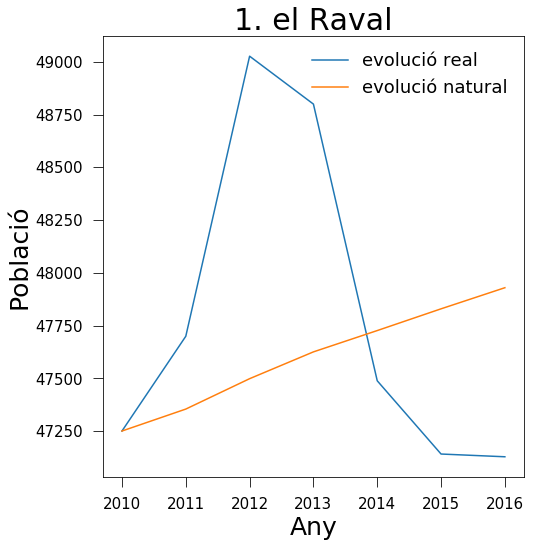

In [74]:
%matplotlib inline
# print evolution of population for neighbourhood
barri = "1. el Raval"
evo_pop_df = df[(df["Barri"] == barri) & (df["Any"] >= 2010)].sort("Any")

# get population and year
year = np.array(evo_pop_df["Any"])
population = np.array(evo_pop_df[u'Població'])

# get natural evolution of the population
population_natural_variation = np.copy(population)
for now in range(1, population_natural_variation.size):
    then = now - 1
    add_people = evo_pop_df[evo_pop_df["Any"] == year[then]][u'Naixements Total'].values
    sub_people = evo_pop_df[evo_pop_df["Any"] == year[then]][u'Defuncions Total'].values 
    population_natural_variation[now] = population_natural_variation[then] + add_people - sub_people


fig = plt.figure(figsize=(9,9))
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.15, bottom=0.1)
ax = fig.add_subplot(gs[0])
ax.set_title(barri, fontsize=30)
ax.set_ylabel(u"Població", fontsize=25)
ax.set_xlabel(u"Any", fontsize=25)
ax.tick_params(which='both', labelsize=15, pad=10, size=10)
ax.plot(year, population, label=u'evolució real')
ax.plot(year, population_natural_variation, label=u'evolució natural')
ax.legend(numpoints=1, prop={'size':18}, frameon=False, loc=1)
fig.savefig("evolucio_poblacio_{}".format(barri.split(".")[-1].strip()))